In [207]:
today = datetime.now().strftime("%Y-%m-%d")
PG = yf.download("PG", start="1995-01-01", end=today, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [208]:
PG.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
1995-01-03,7.350255,15.59375,15.62500,15.43750,15.46875,3318400
1995-01-04,7.291330,15.46875,15.65625,15.31250,15.53125,2218800
1995-01-05,7.188221,15.25000,15.43750,15.21875,15.37500,2319600
1995-01-06,7.202950,15.28125,15.40625,15.15625,15.15625,3438000
1995-01-09,7.173488,15.21875,15.40625,15.18750,15.34375,1795200


In [209]:
PG.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
2025-06-27,159.860001,159.860001,160.130005,158.289993,158.679993,19257000
2025-06-30,159.320007,159.320007,159.899994,158.130005,159.259995,11238200
2025-07-01,161.220001,161.220001,162.529999,159.380005,159.880005,10664900
2025-07-02,161.199997,161.199997,161.350006,159.860001,161.139999,8848700
2025-07-03,160.830002,160.830002,162.020004,159.789993,161.789993,6999600


In [210]:
print(f"Data shape: {PG.shape}")
print(f"First date: {PG.index[0]}")
print(f"Last date: {PG.index[-1]}")
print(f"Total days: {len(PG)}")

Data shape: (7677, 6)
First date: 1995-01-03 00:00:00
Last date: 2025-07-03 00:00:00
Total days: 7677


In [211]:
PG["simple_return"] = (PG["Adj Close"]["PG"] / PG["Adj Close"]["PG"].shift(1)) - 1
print(PG["simple_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008017
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2025-06-27    0.007754
2025-06-30   -0.003378
2025-07-01    0.011926
2025-07-02   -0.000124
2025-07-03   -0.002295
Name: simple_return, Length: 7677, dtype: float64


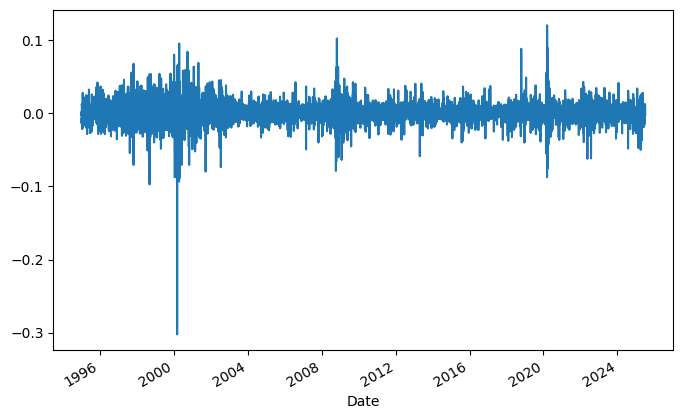

In [212]:
PG["simple_return"].plot(figsize=(8, 5))
plt.show()

In [213]:
PG["log_return"] = np.log(PG["Adj Close"]["PG"] / PG["Adj Close"]["PG"].shift(1))
print(PG["log_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2025-06-27    0.007724
2025-06-30   -0.003384
2025-07-01    0.011855
2025-07-02   -0.000124
2025-07-03   -0.002298
Name: log_return, Length: 7677, dtype: float64


<Axes: xlabel='Date'>

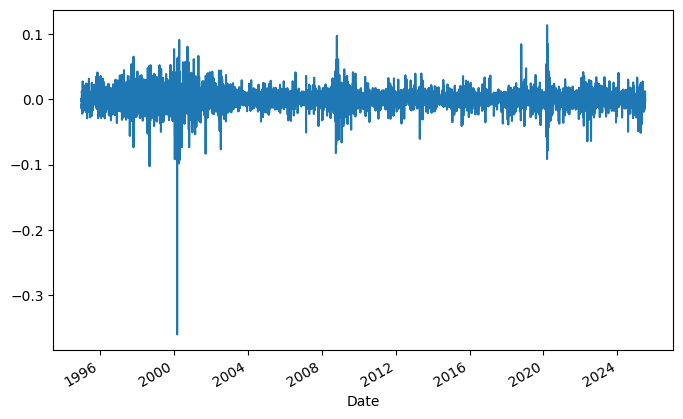

In [214]:
PG["log_return"].plot(figsize=(8, 5))

In [215]:
log_return_d = PG["log_return"].mean()
log_return_d

np.float64(0.00040198188829642864)

In [216]:
log_return_a = PG["log_return"].mean() * 250
log_return_a

np.float64(0.10049547207410717)

In [217]:
print(str(round(log_return_a, 5) * 100) + " %")

10.05 %


In [218]:
tickers = ["PG", "MSFT", "F", "GE"]
mydata = yf.download(tickers, start="1995-01-01", end=today, auto_adjust=False)
mydata = mydata["Adj Close"]

mydata.tail()

[*********************100%***********************]  4 of 4 completed


Ticker,F,GE,MSFT,PG
Date,,,,
2025-06-27,10.80,254.138855,495.940002,159.860001
2025-06-30,10.85,257.014679,497.410004,159.320007
2025-07-01,11.35,248.656876,492.049988,161.220001
2025-07-02,11.77,244.393097,491.089996,161.199997
2025-07-03,11.81,246.520004,498.839996,160.830002


In [219]:
mydata.iloc[0]

Ticker
F        3.407052
GE      20.133743
MSFT     2.305954
PG       7.350255
Name: 1995-01-03 00:00:00, dtype: float64

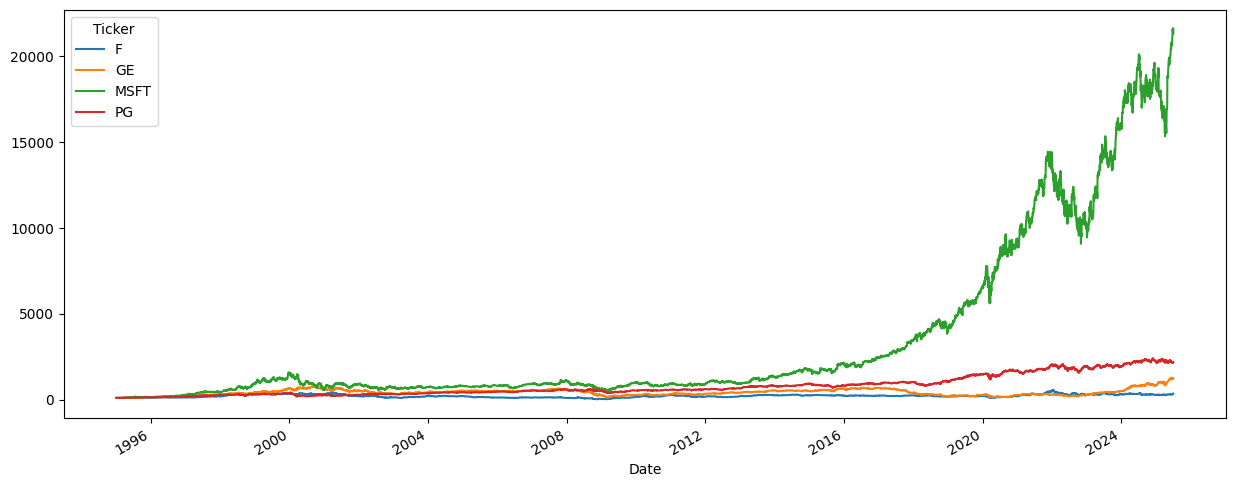

In [220]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

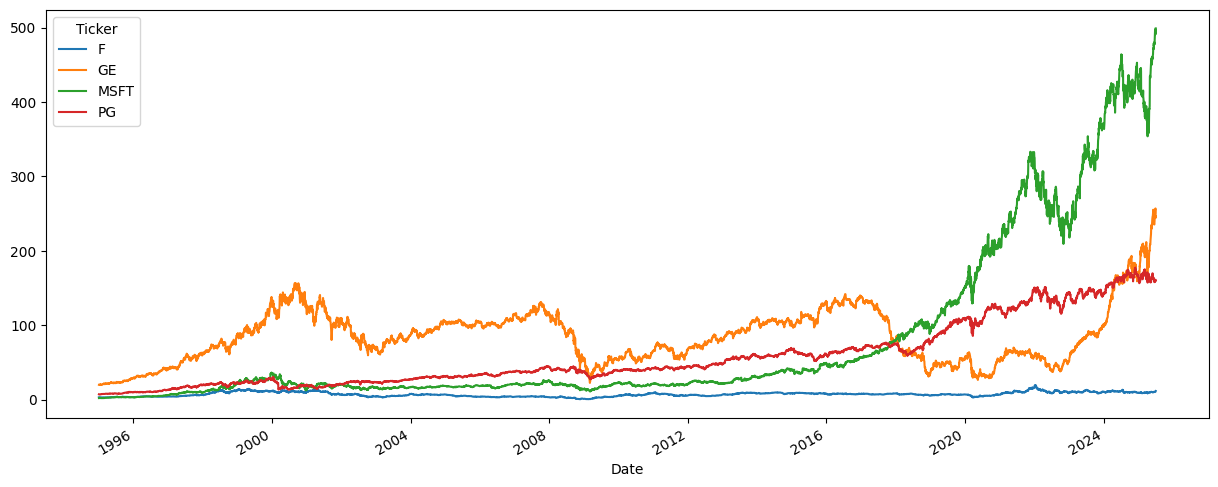

In [221]:
mydata.plot(figsize=(15, 6))
plt.show()

In [222]:
mydata.loc["1995-01-03"]  # Label-based selection for a specific date

Ticker
F        3.407052
GE      20.133743
MSFT     2.305954
PG       7.350255
Name: 1995-01-03 00:00:00, dtype: float64

In [223]:
mydata.iloc[0]  # First row

Ticker
F        3.407052
GE      20.133743
MSFT     2.305954
PG       7.350255
Name: 1995-01-03 00:00:00, dtype: float64

In [224]:
returns = mydata / mydata.shift(1) - 1
returns.head()

Ticker,F,GE,MSFT,PG
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,0.026906,0.000000,0.007269,-0.008017
1995-01-05,-0.008733,0.002451,-0.016495,-0.014141
1995-01-06,0.000000,-0.004890,0.016771,0.002049
1995-01-09,0.017621,-0.009828,-0.006186,-0.004090


In [225]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [226]:
np.dot(returns, weights)

array([        nan,  0.00653961, -0.00922963, ...,  0.00367849,
        0.00444552,  0.00639681], shape=(7677,))

In [227]:
annual_returns = returns.mean() * 250
annual_returns

Ticker
F       0.120291
GE      0.132567
MSFT    0.222867
PG      0.124563
dtype: float64

In [228]:
np.dot(annual_returns, weights)

np.float64(0.1500720505467283)

In [229]:
pfolio_1 = f"{np.dot(annual_returns, weights) * 100:.3f}%"
print(pfolio_1)

15.007%


In [230]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [231]:
pfolio_2 = f"{np.dot(annual_returns, weights_2) * 100:.3f}%"
print(pfolio_2)

14.080%
